In [3]:
import pandas as pd 

data_path = '../data/creditcard.csv'
raw_data = pd.read_csv(data_path)
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
raw_data['Class'].value_counts()
raw_data['Class'].value_counts()[1]

492

In [5]:
import numpy as np
frauds_rate = round(raw_data['Class'].value_counts()[1]/len(raw_data)*100,2)
print('Frauds', frauds_rate, '% of the dataset')

Frauds 0.17 % of the dataset


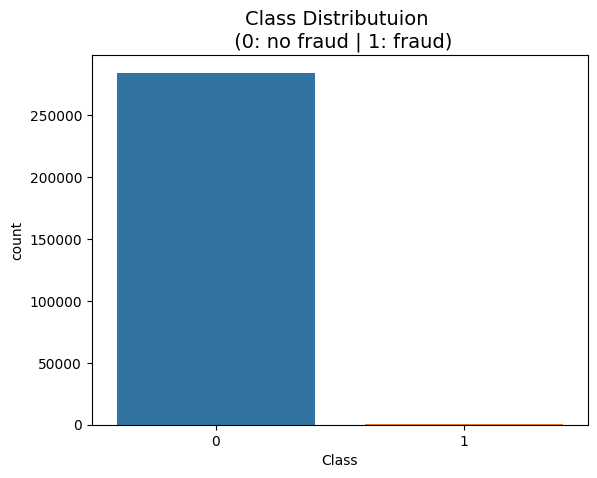

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Class', data = raw_data)
plt.title('Class Distributuion \n (0: no fraud | 1: fraud)', fontsize = 14)
plt.show()

In [7]:
X = raw_data.iloc[: , 1:-1]
y = raw_data.iloc[:, -1]
X.shape, y.shape

((284807, 29), (284807,))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3 , random_state=13, stratify = y)


In [15]:
import numpy as np
np.unique(y_train, return_counts = True)

(array([0, 1]), array([199020,    344]))

In [17]:
tmp = np.unique(y_train, return_counts=True)[1]
tmp[1]/len(y_train) * 100

0.17254870488152324

In [18]:
np.unique(y_test, return_counts=True)

(array([0, 1]), array([85295,   148]))

In [16]:
tmp = np.unique(y_test, return_counts=True)[1]
tmp[1]/len(y_test) * 100

0.17321489179921118

In [19]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test,pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)
    
    return acc, pre, re, f1, auc

In [18]:
from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)
    
    print('-> confusion matrix')
    print(confusion)
    print('===============')
    
    print('accuracy: {0:.4f}, precision : {1:.4f})'.format(acc,pre))
    print('recall: {0:.4f}, f1 : {1:.4f}), auc : {2:.4f}'.format(re,f1,auc))

In [20]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state = 13, solver = 'liblinear')
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print_clf_eval(y_test,lr_pred)

NameError: name 'print_clf_eval' is not defined

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state = 13, max_depth =4)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print_clf_eval(y_test, dt_pred)

-> confusion matrix
[[85281    14]
 [   42   106]]
accuracy: 0.9993, precision : 0.8833)
recall: 0.7162, f1 : 0.7910), auc : 0.8580


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state = 13, n_jobs = -1, n_estimators =100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print_clf_eval(y_test, rf_pred)

NameError: name 'X_train' is not defined

In [22]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leave = 64, n_jobs = -1 , boost_from_average= False)
lgbm_clf.fit(X_train, y_train)

lgbm_pred = lgbm_clf.predict(X_test)
print_clf_eval(y_test, lgbm_pred)

[LightGBM] [Warning] Unknown parameter: num_leave
-> confusion matrix
[[85291     4]
 [   34   114]]
accuracy: 0.9996, precision : 0.9661)
recall: 0.7703, f1 : 0.8571), auc : 0.8851


/tmp/ipykernel_10526/3110250249.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data['Amount'], color = 'r')


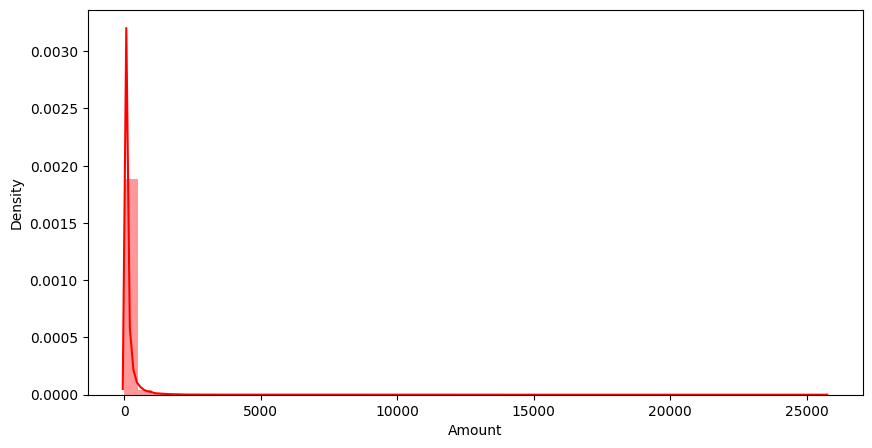

In [23]:
plt.figure(figsize=(10,5))

sns.distplot(raw_data['Amount'], color = 'r')

plt.show()

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
amount_n = scaler.fit_transform(raw_data['Amount'].values.reshape(-1,1))

raw_data_copy = raw_data.iloc[:, 1:-2]
raw_data_copy['Amount_Scaled'] = amount_n
raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [25]:
X_train, X_test, y_train, y_test = train_test_split(raw_data_copy, y, test_size = 0.3, random_state=13, stratify = y)



In [26]:
import time 
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]

model_names = ['LinearReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()

# results = get_result_pd(models, model_names, X_train, y_train, X_test, y_test)

/home/seungsu/venv/opencv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Amount_Scaled
Feature names seen at fit time, yet now missing:
- Amount

  warnings.warn(message, FutureWarning)
/home/seungsu/venv/opencv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Amount_Scaled
Feature names seen at fit time, yet now missing:
- Amount

  warnings.warn(message, FutureWarning)
/home/seungsu/venv/opencv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Amount_Scaled
Feature names seen at fit time, yet now mis

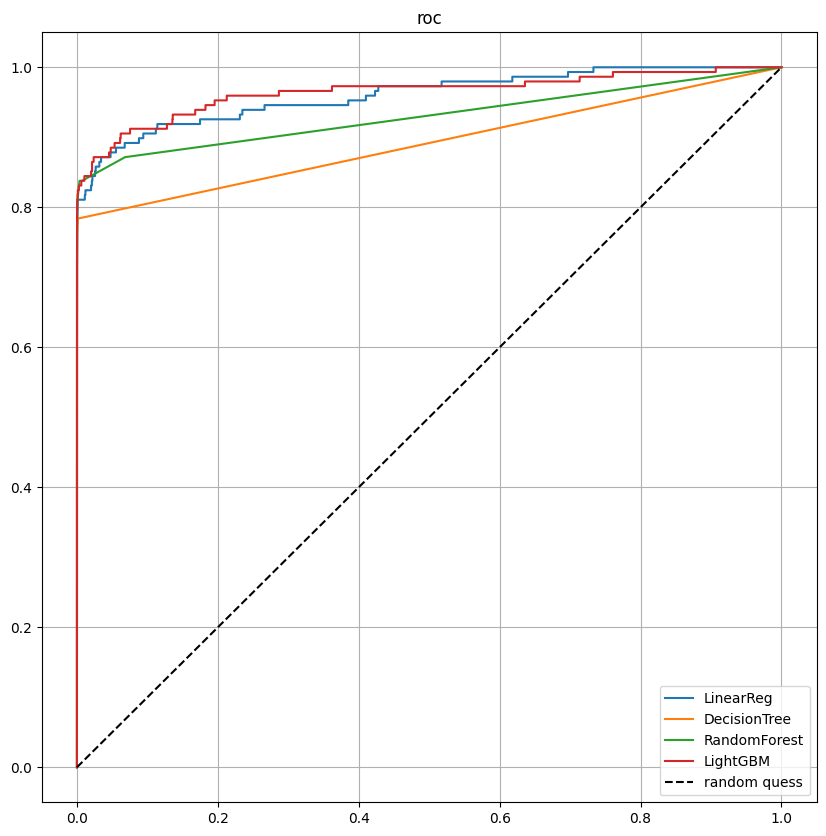

In [27]:
from sklearn.metrics import roc_curve

def draw_roc_curve(models, model_names, X_test, y_test):
    plt.figure(figsize=(10,10))
    
    for model in range(len(models)):
        pred = models[model].predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        plt.plot(fpr, tpr, label=model_names[model])
        
    plt.plot([0,1],[0,1], 'k--', label ='random quess')
    plt.title('roc')
    plt.legend()
    plt.grid()
    plt.show()
    
draw_roc_curve(models,model_names, X_test, y_test)

In [28]:
amount_log = np.log1p(raw_data['Amount'])

raw_data_copy['Amount_Scaled'] = amount_log

raw_data_copy.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.262539


/tmp/ipykernel_10526/541469088.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(raw_data_copy['Amount_Scaled'], color = 'r')


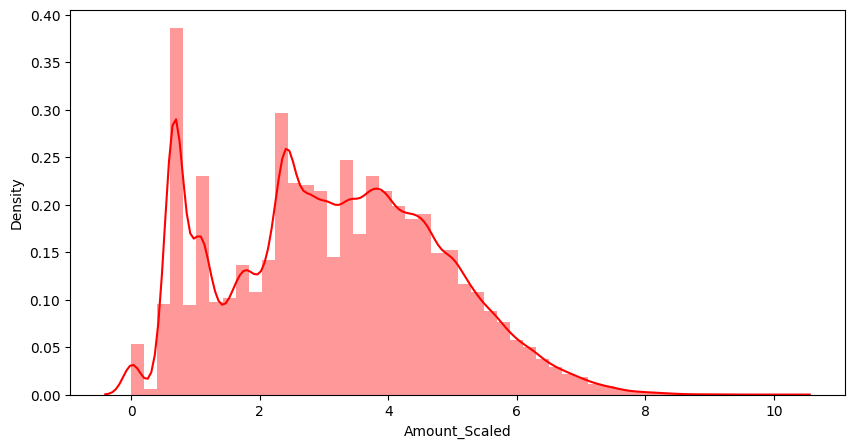

In [29]:
plt.figure(figsize=(10,5))
sns.distplot(raw_data_copy['Amount_Scaled'], color = 'r')

plt.show()

/home/seungsu/venv/opencv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Amount_Scaled
Feature names seen at fit time, yet now missing:
- Amount

  warnings.warn(message, FutureWarning)
/home/seungsu/venv/opencv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Amount_Scaled
Feature names seen at fit time, yet now missing:
- Amount

  warnings.warn(message, FutureWarning)
/home/seungsu/venv/opencv/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Amount_Scaled
Feature names seen at fit time, yet now mis

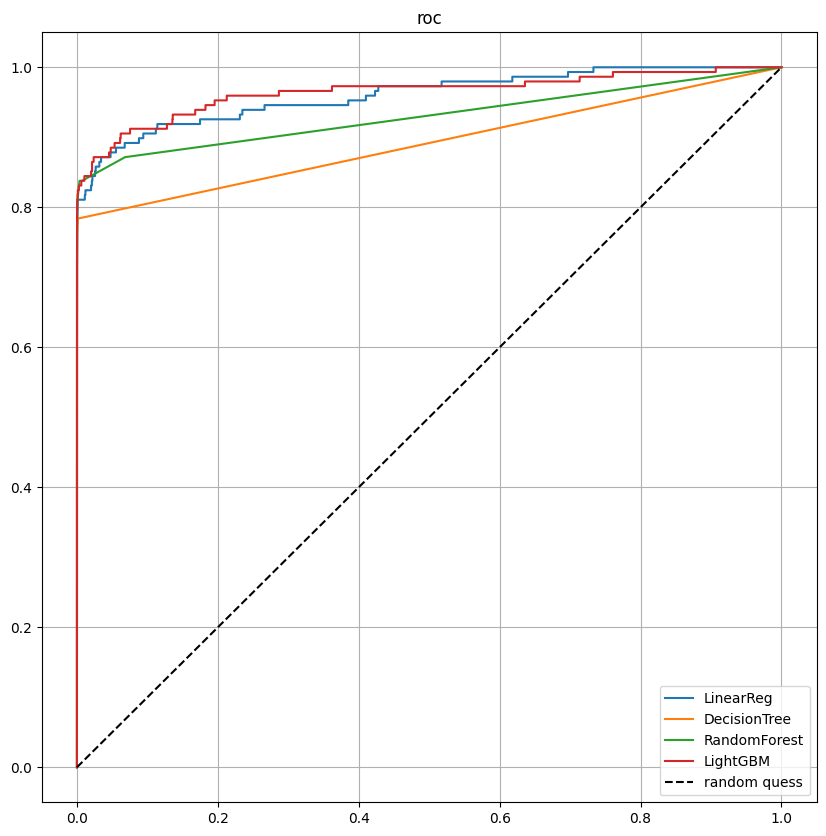

In [30]:
draw_roc_curve(models, model_names, X_test, y_test)

In [2]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state= 13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

## SMOTE 
## Synthetic minority over-sampling technique

NameError: name 'X_train' is not defined

In [41]:
X_train.shape, y_train.shape

((199364, 29), (199364,))

In [42]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

In [43]:
print(np.unique(y_train, return_counts = True))
print(np.unique(y_train_over, return_counts=True))

(array([0, 1]), array([199020,    344]))
(array([0, 1]), array([199020, 199020]))


In [10]:
def get_result(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    return get_clf_eval(y_test, pred)

In [11]:
def get_result_pd(models, model_names, X_train, y_train, X_test, y_test):
    col_names = ['accuracy', 'precision', 'recall' , 'f1' , 'roc_auc']
    tmp = []
    
    for model in models:
        tmp.append(get_result(model, X_train, y_train, X_test, y_test))
        
    return pd.DataFrame(tmp, columns = col_names, index = model_names)
        

In [13]:
models = [lr_clf, dt_clf, rf_clf, lgbm_clf]
model_names = ['LinearReg', 'DecisionTree', 'RandomForest', 'LightGBM']

start_time = time.time()
results = get_result_pd(models,model_names, X_train_over, y_train_over, X_test, y_test)

print('Fit time : ', time.time() - start_time)
results

NameError: name 'lr_clf' is not defined

In [12]:
draw_roc_curve(models, model_names, X_test, y_test)

NameError: name 'draw_roc_curve' is not defined